# 1. Cleaning

Note: the existing "2008.csv" file in the directory could be the smaller version of the original.
Consider downloading full-size file from http://stat-computing.org/dataexpo/2009/2008.csv.bz2

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# show plot intermediately under the calling cell
%matplotlib inline

# disable some warnings
import warnings
warnings.simplefilter(action = "ignore")

# set to unlimited column display:
pd.set_option('display.max_columns', None)

# import database
df = pd.read_csv('2008.csv')

<center>Table: (sample) Dataframe including column dtype</center>

In [2]:
dtypes = pd.Series(df.dtypes,name='dtypes')
df.head(2).append(dtypes)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,3,29,6,1118,1100,1133,1116,EV,4654,N981EV,75,76,52,17,18,ATL,MOB,302,2,21,0,NaN,0,17,0,0,0,0
1,2008,6,27,5,1358,1405,1953,2000,CO,1848,N39343,235,235,216,-7,-7,SJC,IAH,1608,5,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
dtypes,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,int64,float64,float64,int64,object,int64,float64,float64,float64,float64,float64


## 1.1. Descriptive Statistics

<center>Figure: Correlation Matrix of some columns</center>

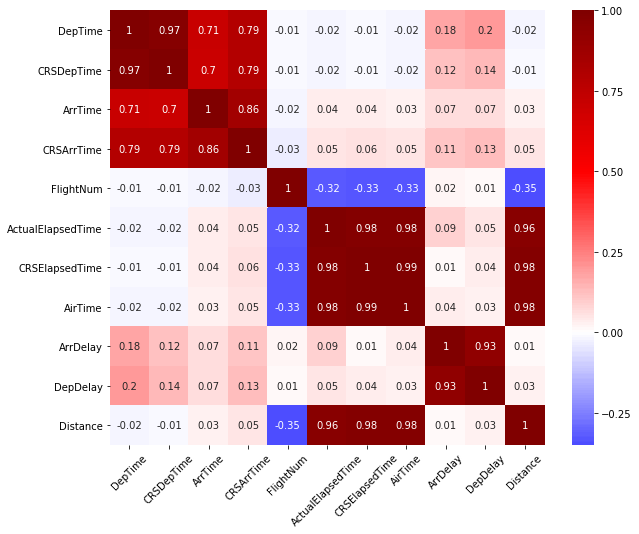

In [3]:
def plot_corr_matr(df, figsize=(10, 8)):
    """
    Plot Correlation matrix using Seaborns heatmap

    Parameters
    ----------
    df: pandas.DataFrame

    figsize: tuple
        size of the whole plot
    """
    plt.figure(figsize=figsize)
    corr = df.corr().round(2)
    # mask = np.zeros_like(corr)
    # mask[np.triu_indices_from(mask)] = True
    sns.heatmap(
        corr,
        cmap="seismic",
        square=True,
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values,
        center=0,
        annot=True)
    plt.xticks(rotation=45)
    plt.show()
    
plot_corr_matr(df.loc[:,'DepTime':'Distance'])
# plot_corr_matr(df)

//////// _From the graph above, which features, in your opinions, should be removed, which should be kept, why?_

<center>Table: Describe database</center>

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DepTime,6.87348e+06,NaN,NaN,NaN,1333.83,478.069,1,928,1325,1728,2400
ArrTime,6.85808e+06,NaN,NaN,NaN,1481.26,505.225,1,1107,1512,1909,2400
UniqueCarrier,7009728,20,WN,1201754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlightNum,7.00973e+06,NaN,NaN,NaN,2224.2,1961.72,1,622,1571,3518,9743
TailNum,6926363,5373,N476HA,4701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrDelay,6.85503e+06,NaN,NaN,NaN,8.16845,38.5019,-519,-10,-2,12,2461
Origin,7009728,303,ATL,414513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dest,7009728,304,ATL,414521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,7.00973e+06,NaN,NaN,NaN,726.387,562.102,11,325,581,954,4962


## 1.2. NaN Cleaning

<center>Table: Recheck describe columns with NaN values</center>

In [ ]:
from IPython.display import display
import pandas as pd
def desc_nan(df):
    """
    Show a table that describe about all columns of @df that contain NaN.
    """
    row, col = df.shape
    nas = row - df.describe(include='all').T['count']
    nas = nas[nas > 0]
    ps = nas / row * 100
    ms = df.mode().iloc[0]
    nadf = pd.DataFrame(data={
        'Na Count': nas,
        'Na Percentage': ps,
        'mode': ms
    }).loc[nas.index]
    dnadf = df.describe().T.reindex(nadf.index)
    nadf = pd.concat([nadf, dnadf.iloc[:, 1:]], axis=1)
    display(nadf)

desc_nan(df)

<center>Figure: Distribution plot of all numeric columns</center>

In [ ]:
def plot_ft_dist(df, fig_height=4, no_of_col=2,verbose=True):
    """
    Plot distribution of all numeric columns in df

    Parameters
    ----------
    df: pandas.DataFrame

    fig_height: int

    no_of_col: int
    """
    df = df.copy()
    # prepare df
    cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
    if verbose:
        print("Ignored categorical columns: ", cat_cols)
        print("")
    df_hasnan = df.isna().any().any()
    if df_hasnan:
        nan_cols = list(df.loc[:,df.isna().any()].columns)
        df.dropna(inplace=True, axis=1)
        if verbose:
            print("dropped NaN cols:", str(nan_cols))
            print("")
    try:    
        desc = df.describe().T
        std0 = list(desc.loc[desc['std']==0].index)
        if verbose:
            print("dropped std=0 cols:", str(std0))
            print("")
        for col in std0:
            del df[col]
    except KeyError:
        pass
    
    idx = df.dtypes[df.dtypes != 'object'].index
    # prepare frame
    f, axes = plt.subplots(
        int(np.ceil(len(idx) / no_of_col)),
        no_of_col,
        figsize=(5 * no_of_col, np.ceil(len(idx) / no_of_col) * fig_height))
    sns.set(style="white", palette="muted", color_codes=True)
    n = 0
    for i in idx:
        sns.distplot(
            df[i],
            color='b',
            hist=True,
            kde_kws={"shade": True},
            ax=axes[n // no_of_col, n % no_of_col])
        n += 1
    plt.show()

plot_ft_dist(df)

////// _Run codes above, describe what you see and start clean data / remove unimportant columns._

<center>Table: (sample) Database after cleaning</center>

In [10]:
df.head(2)

,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,Origin,Dest,Distance
0,2003.0,2211.0,WN,335,N712SW,-14.0,IAD,TPA,810
1,754.0,1002.0,WN,3231,N772SW,2.0,IAD,TPA,810


## 1.3. Feature Engineering

/////////// Give some insights, split train-test dataset

### 1.3.1 Data Transformation

__DepTime, ArrTime__ are time values which if being stored in 10-based (decimal), their true values will be distorted (hours:minutes is not continuous on 10-based).
#=> convert to minute integer

In [7]:
# convert column to min:
def to_min(n):
    n = str(int(n))
    if len(n)<=2:
        return int(n)
    else:
        return int(n[:-2])*60+int(n[2:])
df.DepTime=df.DepTime.apply(to_min)
df.ArrTime=df.ArrTime.apply(to_min)

Convert all float dtype columns to int64 dtype

In [8]:
for col in df.columns:
    if df[col].dtype == np.float:
        df[col] = df[col].astype(np.int64)

<center>Table: (sample) Dataframe after dtype convertion</center>

In [ ]:
dtypes = pd.Series(df.dtypes,name='dtypes')
df.head(2).append(dtypes)

### 1.3.2. One-hot-encoding

In order to pick which feature to use One-hot-encoding, we see how many unique data in each category data, then use boxplot to check the variation of ArrDelay by those features.
<br><br>
<center>Table: Unique value from each categorial feature</center>

In [14]:
pd.DataFrame(df.describe(include="O").loc['unique']).T

,UniqueCarrier,TailNum,Origin,Dest
unique,20,5362,303,302


/////// _start your code below to one hot encode or label encoding categorical features_

## 2.2. Normalize data

/////// _normalize / scale your data to range [0,1]

Because of feature scaling, new table of normalized data (in range [0,1]) is needed.

<center>Table: (sample) Predictor X (without PCA)

In [12]:
X[:2]

,DepTime,ArrTime,FlightNum,ArrDelay,Distance,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0.835302,0.924253,0.042667,0.495584,0.267851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.293954,0.417651,0.412621,0.511286,0.267851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 2.3. PCA

<center>Figure: Explaination ratio though dimensions using PCA and Cumulative explained variance table in details</center>

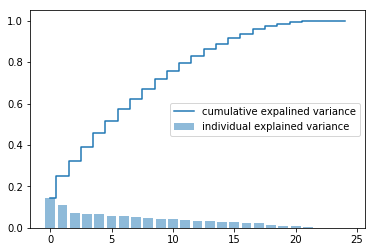

,dim 1,dim 2,dim 3,dim 4,dim 5,dim 6,dim 7,dim 8,dim 9,dim 10,dim 11,dim 12,dim 13,dim 14,dim 15,dim 16,dim 17,dim 18,dim 19,dim 20,dim 21,dim 22,dim 23,dim 24,dim 25
0,0.141586,0.24966,0.322052,0.390733,0.456134,0.514682,0.572537,0.62423,0.672122,0.716696,0.757787,0.793926,0.828843,0.861699,0.889374,0.916564,0.938245,0.95907,0.972592,0.98354,0.99231,0.997823,0.998936,1.0,1.0


In [13]:
def plot_PCA(df):
    """
    Show the "PCA ladder" in order to pick the right

    Parameters
    ----------
    df: pandas.DataFrame

    fig_height: int

    no_of_col: int
    """
    from sklearn.decomposition import PCA

    pca = PCA(n_components=len(df.columns))
    pca.fit_transform(df)
    # put data (predictor only) to pca and create pcadf
    ratio = pca.explained_variance_ratio_

    tot = sum(ratio)
    var_exp = [(i / tot) for i in ratio]
    cum_var_exp = np.cumsum(var_exp)

    plt.bar(
        range(0, len(df.columns)),
        var_exp,
        alpha=0.5,
        align='center',
        label='individual explained variance')
    plt.step(
        range(0, len(df.columns)),
        cum_var_exp,
        where='mid',
        label='cumulative expalined variance')
    plt.ylabel = 'Explained variance ratio'
    plt.xlabel = 'Pricipal components'
    plt.legend(loc='best')
    plt.show()

    # show table with more details
    pdf = pd.DataFrame(
        [cum_var_exp],
        columns=["dim {}".format(i) for i in range(1,
                                                   len(df.columns) + 1)])
    display(pdf)
    
    
plot_PCA(X)

//////////// the code below has "n" as dimensions to reduce to, decide that number so the total explation ratio > 0.95

In [14]:
from sklearn.decomposition import PCA
# create a PCA to reduce dimension to n
n = # ?????
pca = PCA(n_components=n)
# put data (predictor only) to pca and create pcadf
X = pd.DataFrame(pca.fit_transform(X))

In [ ]:
# Save processed database to a csv file
import os
os.chdir(r'.\working_database')

x_tune.to_csv('x_tune.csv')
pd.DataFrame(y_tune).to_csv('y_tune.csv')
x_train.to_csv('x_train.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
x_test.to_csv('x_test.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

os.chdir('..')

# 3. Classification Models

In [ ]:
# import neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# show plot intermediately under the calling cell
%matplotlib inline

# disable some warnings
import warnings
warnings.simplefilter(action = "ignore")

# set to unlimited column display:
pd.set_option('display.max_columns', None)

# Load processed database from a csv file
import os
os.chdir(r'.\working_database')

x_tune = pd.read_csv('x_tune.csv', index_col=0)
y_tune = pd.read_csv('y_tune.csv', index_col=0)
x_train = pd.read_csv('x_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
x_test = pd.read_csv('x_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

os.chdir('..')

The following model will use default parameters and sample classification report

## 3.1. Naive Bayes

Initialize the model and fit the train database

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

In [3]:
from sklearn.metrics import classification_report
print('Classification_report: \n', 
      classification_report(
          y_true=y_test,
          y_pred=nb.predict(x_test)))

Classification_report: 
              precision    recall  f1-score   support

      False       0.87      0.96      0.91    217073
       True       0.18      0.06      0.09     32927

avg / total       0.78      0.84      0.80    250000



////// Search google for "sklearn logistics regression" / decision tree / svm and figure out how to work on below parts

## 3.2. Logistics Regression

## 3.3. Decision Tree

## 3.4. SVM

# Z. Other
Additional parts

## Z.1. Pickle

In [ ]:
# Save a model into a pickle file.
import pickle
import os
os.chdir(r'.\saved_models')
pickle.dump(svm, open( "svm.model", "wb" ) )
os.chdir('..')

In [ ]:
# Load the model back from the pickle file.
import pickle
import os
os.chdir(r'.\saved_models')
lr = pickle.load(open("lr.model", "rb"))
nb = pickle.load(open("nb.model", "rb"))
rf = pickle.load(open("rf.model", "rb"))
tree = pickle.load(open("tree.model", "rb"))
svm = pickle.load(open("svm.model", "rb"))
os.chdir('..')